In [237]:
import nltk as nt
import matplotlib.pyplot as plt
import re as rex
import sklearn as sk
import pandas as pd 


doc = open('ITM618-041-assignment-02-Text-Mining-data.txt', 'r')
lines_doc = doc.readlines()
print(type(lines_doc))


<class 'list'>


In [238]:
without_leadingNtrailing_doc = []

#Strip leading and trailing characters
#Eliminate Empty Strings 
for i in lines_doc:
    without_leadingNtrailing_doc.append(i.strip())

print(without_leadingNtrailing_doc[305])

Original article on Model S from @consumerreports: http://t.co/OiXLz618


In [239]:
#Validate that strip also removed all empty strings. 
for x in without_leadingNtrailing_doc: 
    if x == "": 
        print(x)
    else: 
        print("clear of empty strings")
        break

print(without_leadingNtrailing_doc[300])



clear of empty strings
Alexander Hamilton was awesome http://t.co/2bHf4zS0


In [240]:
#Concat list on space as one long string 
from nltk.tokenize import word_tokenize, sent_tokenize
nt.download('stopwords')
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]

doc = ' '.join(map(str, without_leadingNtrailing_doc))

doc = rex.sub("@[A-Za-z0-9_]+","", doc)
doc = rex.sub("#[A-Za-z0-9_]+","", doc)
doc = rex.sub(r'rt','', doc)
doc = rex.sub('\s+', ' ', doc) # substitutes newline/tab/space with one space in the text
doc = rex.sub(r'[0-9]+', '', doc) # remove numbers 
doc = rex.sub(r'[^\w\s]', '', doc) # remove punctuation

doc = rex.sub(r'http\S+', '', doc)
doc = doc.lower()
doc = ' '.join([word for word in doc.split() if word not in stopwords])
long_str_doc = doc.split('/n')


# joined_doc = ' '.join(map(str, without_leadingNtrailing_doc))
# joined_doc = joined_doc.lower()
# joined_doc = rex.sub("'", "",joined_doc)
# joined_doc = rex.sub("@[A-Za-z0-9_]+","", joined_doc)
# joined_doc = rex.sub("#[A-Za-z0-9_]+","", joined_doc)
# joined_doc = rex.sub(r'http\S+', '', joined_doc)
# joined_doc = rex.sub('[()!?]', ' ', joined_doc)
# joined_doc = rex.sub('\[.*?\]',' ', joined_doc)
# joined_doc = rex.sub("[^a-z0-9]"," ", joined_doc)
# print(joined_doc)
# joined_doc = [w for w in joined_doc if not w in stopwords]
# joined_doc = " ".join(word for word in joined_doc)


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>


In [241]:
from nltk.tokenize import word_tokenize, sent_tokenize
nt.download('stopwords')
tokenized_doc = nt.word_tokenize(doc) #Tokenized the text
sent_tokenized_doc = nt.sent_tokenize(doc)


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>


In [242]:
#Removing stopwords 
from nltk.corpus import stopwords
additional = ['rt', 'rts', 'retweets']
stopwords = set().union(stopwords.words('english'), additional)

filtered_doc = []

for w in tokenized_doc:
    if w not in stopwords:
        filtered_doc.append(w)



In [243]:
nt.download('omw-1.4')
nt.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmantizer = WordNetLemmatizer()

lemmatized_n_tokkenized_doc = []

for w in filtered_doc:
    lemmatized_n_tokkenized_doc.append(lemmantizer.lemmatize(w))

[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>


In [244]:
# #Count Vectorizer 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,3)) #Uni grams bi grams and trigrams

vectorized_doc = count_vectorizer.fit_transform(lemmatized_n_tokkenized_doc)

print(vectorized_doc.shape)
print(vectorized_doc.toarray())

(49736, 8392)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [245]:
tfidfvectorizer = TfidfVectorizer()

tfidfvec_doc = tfidfvectorizer.fit_transform(lemmatized_n_tokkenized_doc)
print(tfidfvec_doc.toarray())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [246]:
#wordcloud alternative using NLTK and matplot
wordfreqdist = nt.FreqDist(lemmatized_n_tokkenized_doc)
mostcommon = wordfreqdist.most_common(30)
print(mostcommon)

[('tesla', 723), ('amp', 703), ('model', 430), ('car', 393), ('good', 269), ('like', 251), ('launch', 249), ('yes', 224), ('falcon', 215), ('rocket', 212), ('year', 194), ('first', 189), ('time', 182), ('would', 174), ('next', 171), ('one', 159), ('new', 156), ('make', 154), ('great', 149), ('people', 148), ('dont', 134), ('thanks', 134), ('need', 133), ('spacex', 133), ('u', 133), ('go', 129), ('much', 126), ('dragon', 126), ('landing', 125), ('week', 125)]


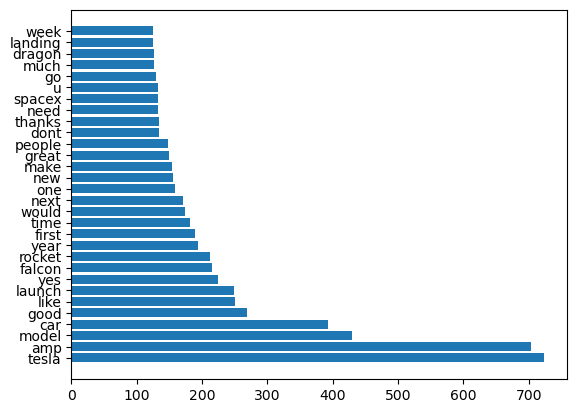

In [247]:
#Graph to show word frequency instead of word cloud as import was not working. 
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

In [248]:
#Entity Recognition 
pos_tagging = nt.pos_tag(lemmatized_n_tokkenized_doc)
print(pos_tagging[0:30])


[('text', 'JJ'), ('please', 'NN'), ('ignore', 'VB'), ('prior', 'JJ'), ('tweet', 'NN'), ('someone', 'NN'), ('pretending', 'VBG'), ('actually', 'RB'), ('went', 'VBD'), ('iceland', 'JJ'), ('sat', 'VBD'), ('ride', 'RB'), ('bumper', 'JJ'), ('car', 'NN'), ('ice', 'NN'), ('country', 'NN'), ('vlads', 'VBZ'), ('rink', 'VBP'), ('van', 'JJ'), ('nuys', 'JJ'), ('awesome', 'JJ'), ('family', 'NN'), ('fun', 'NN'), ('made', 'VBD'), ('volume', 'NN'), ('model', 'NN'), ('go', 'VBP'), ('need', 'JJ'), ('work', 'NN'), ('miniature', 'NN')]


In [249]:
from nltk import ne_chunk
chunk = ne_chunk(pos_tagging)


(S
  text/JJ
  please/NN
  ignore/VB
  prior/JJ
  tweet/NN
  someone/NN
  pretending/VBG
  actually/RB
  went/VBD
  iceland/JJ
  sat/VBD
  ride/RB
  bumper/JJ
  car/NN
  ice/NN
  country/NN
  vlads/VBZ
  rink/VBP
  van/JJ
  nuys/JJ
  awesome/JJ
  family/NN
  fun/NN
  made/VBD
  volume/NN
  model/NN
  go/VBP
  need/JJ
  work/NN
  miniature/NN
  stonehenge/NN
  great/JJ
  voltaire/NN
  quote/NN
  arguably/RB
  better/RBR
  twain/NN
  hearing/VBG
  news/NN
  death/NN
  voltaire/NN
  replied/VBD
  repos/JJ
  true/JJ
  premature/NN
  total/JJ
  non/JJ
  sequitur/NN
  btw/NN
  reading/VBG
  great/JJ
  biography/NN
  ben/NN
  franklin/NN
  isaacson/NN
  highly/RB
  recommended/VBD
  read/JJ
  lying/VBG
  new/JJ
  book/NN
  friend/NN
  sam/VBZ
  harris/JJ
  excellent/JJ
  cover/NN
  lot/NN
  good/JJ
  reason/NN
  lie/NN
  sam/NN
  harris/NN
  also/RB
  wrote/VBD
  nice/JJ
  piece/NN
  awesomeness/NN
  hitchens/NNS
  may/MD
  good/VB
  man/NN
  rip/NN
  crowd/VBP
  cry/NN
  glorious/JJ
  leader

In [250]:
#Sentiment Analysis by word for whole doc 
import  nltk.sentiment.vader as vd
sia = vd.SentimentIntensityAnalyzer()

df_by_word = pd.DataFrame(lemmatized_n_tokkenized_doc, columns=['words'])
polarity = [round(sia.polarity_scores(i)['compound'], 2) for i in df_by_word['words']]
df_by_word['polarity'] = polarity
df_by_word

,words,polarity
0,text,0.00
1,please,0.32
2,ignore,-0.36
3,prior,0.00
4,tweet,0.00
...,...,...
49731,alien,0.00
49732,race,0.00
49733,million,0.00
49734,year,0.00


In [251]:
n=df_by_word["polarity"]
m=pd.Series(n)

In [252]:

pos=0
neg=0
neu=0

for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print(pos,"Positive Word Occurences |",neg,"Negative Word Occurences |",neu,"Neutral Word Ocurrences |")

Neutral
Positive
Negative
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Negative
Positive
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Negative
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Negative
Positive
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutra

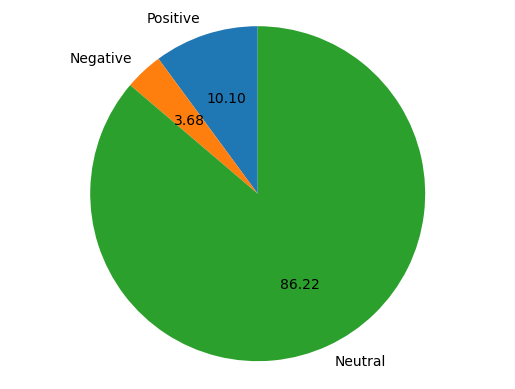

In [253]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()


Thus we can conclude that the txt file seems to have a predominatly neutral sentiment but with more positive word instances then negative. We can also tell from the word bar chart that the file seems to mention the words tesla, car and model a lot. Displaying that the file seems to be tweets revolving around one of the tesla model cars as well as the spacex dragon rocket. If we were to make an assumption based on this finding removing the high amount of neutral words we would most likly discover a relativly positive sentiment about the tesla car and spacex dragon rocket.